# Project code

#Mizanur Rahman

In [88]:
#importing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [89]:
# Reading and displaying data
temp = pd.read_csv("monthly-surface-air-temperature-&-precipitation-1991-2022_-ecuador.csv", sep='\t')
temp

,Category,Average Minimum Surface Air Temperature,Average Mean Surface Air Temperature,Average Maximum Surface Air Temperature,Precipitation
0,Jan,15.87,21.76,27.70,171.99
1,Feb,16.10,21.84,27.63,217.77
2,Mar,16.20,21.84,27.53,268.57
3,Apr,16.13,21.84,27.60,267.03
4,May,15.99,21.69,27.44,246.69
5,Jun,15.43,21.06,26.74,184.63
6,Jul,14.86,20.67,26.53,176.05
7,Aug,14.65,20.83,27.07,95.99
8,Sep,14.83,21.13,27.48,104.24
9,Oct,15.33,21.45,27.62,124.68


In [90]:
temp.dtypes

Category                                    object
Average Minimum Surface Air Temperature    float64
Average Mean Surface Air Temperature       float64
Average Maximum Surface Air Temperature    float64
Precipitation                              float64
dtype: object

In [91]:
#displaying category names, months
temp['Category']

0     Jan
1     Feb
2     Mar
3     Apr
4     May
5     Jun
6     Jul
7     Aug
8     Sep
9     Oct
10    Nov
11    Dec
Name: Category, dtype: object

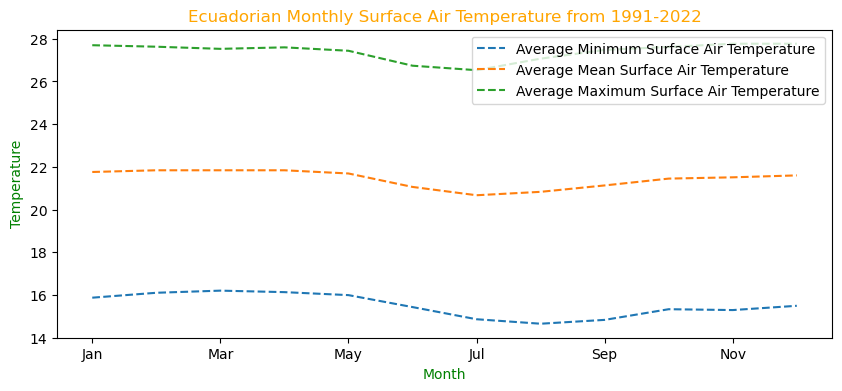

In [92]:
#graph for min mean, max temperature

# minimum_temp = temp["Average Minimum Surface Air Temperature"]
# mean_temp = temp["Average Mean Surface Air Temperature"]
# maximum_temp = temp["Average Maximum Surface Air Temperature"]
# precipitation = temp["Precipitation"]
#["P25th", "Median", "P75th"], kind="bar"

#plt.plot(temp["Category"], minimum_temp,mean_temp,maximum_temp)
# plt.plot(temp["Category"], minimum_temp,mean_temp)
# plt.show()

temp.plot(x="Category", y=["Average Minimum Surface Air Temperature","Average Mean Surface Air Temperature", "Average Maximum Surface Air Temperature"], linestyle="dashed", figsize=(10, 4))
plt.xlabel("Month", c = "Green")
plt.ylabel("Temperature", c = "Green")
plt.title("Ecuadorian Monthly Surface Air Temperature from 1991-2022", c= "Orange")
plt.show()

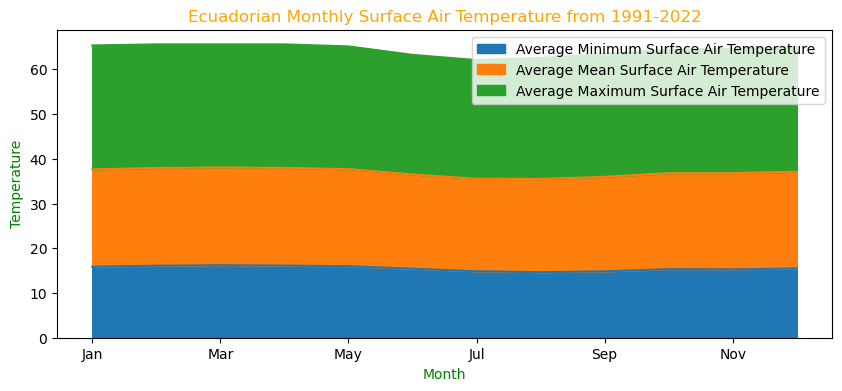

In [93]:
#Area graph
temp.plot(x="Category", y=["Average Minimum Surface Air Temperature","Average Mean Surface Air Temperature", "Average Maximum Surface Air Temperature"], kind="area", figsize=(10, 4))
plt.xlabel("Month", c = "Green")
plt.ylabel("Temperature", c = "Green")
plt.title("Ecuadorian Monthly Surface Air Temperature from 1991-2022", c= "Orange")
plt.show()

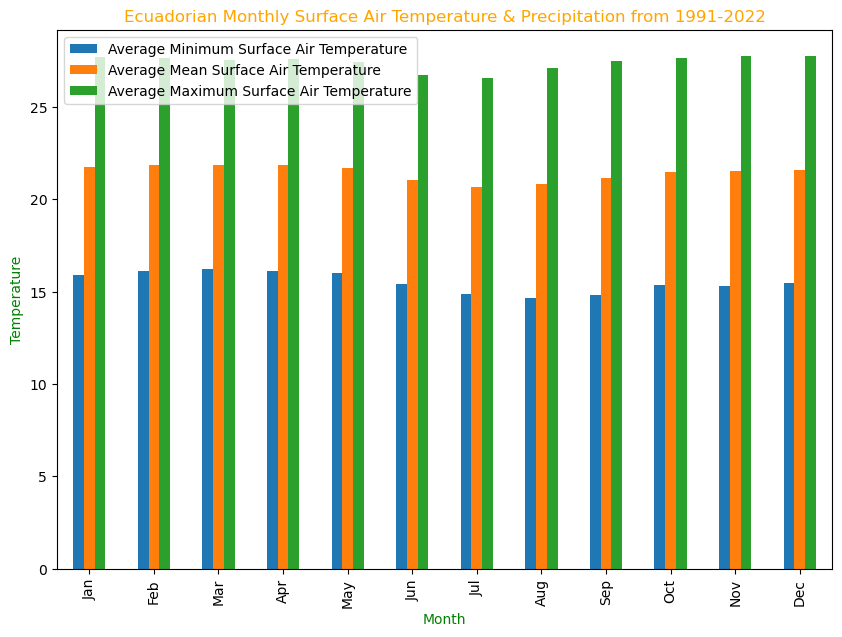

In [94]:
#Bar graph
temp.plot(x="Category", y=["Average Minimum Surface Air Temperature","Average Mean Surface Air Temperature", "Average Maximum Surface Air Temperature"], kind="bar", figsize=(10, 7))
plt.xlabel("Month", c = "Green")
plt.ylabel("Temperature", c = "Green")
plt.title("Ecuadorian Monthly Surface Air Temperature & Precipitation from 1991-2022", c= "Orange")
plt.show()

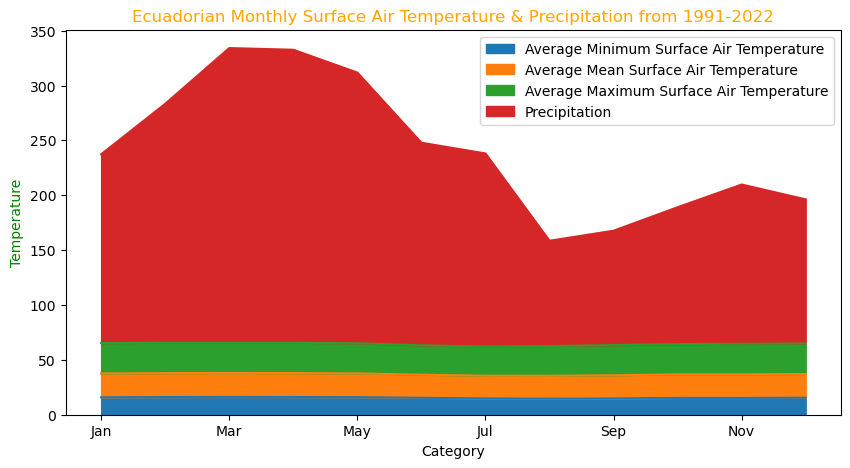

In [95]:
#Area graph
temp.plot(x="Category", y=["Average Minimum Surface Air Temperature","Average Mean Surface Air Temperature", "Average Maximum Surface Air Temperature", "Precipitation"], kind="area", figsize=(10, 5))
plt.ylabel("Temperature", c = "Green")
plt.title("Ecuadorian Monthly Surface Air Temperature & Precipitation from 1991-2022", c= "Orange")
plt.show()

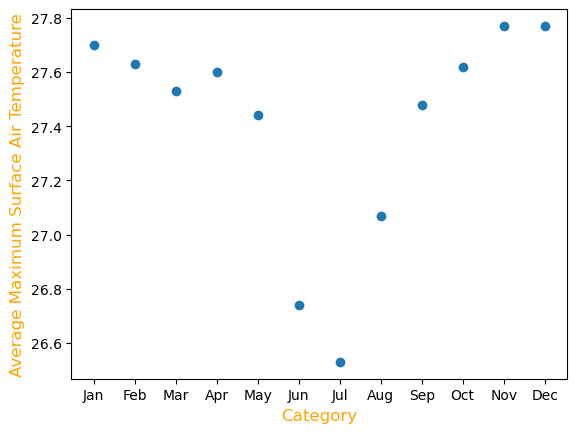

In [96]:
y = temp['Average Maximum Surface Air Temperature']
x = temp['Category']
plt.scatter(x,y)
plt.xlabel('Category', fontsize = 12, c='Orange')
plt.ylabel('Average Maximum Surface Air Temperature', fontsize = 12, c='Orange')
plt.show()

In [97]:
#labels = np.array(df['1971-2020'])
#labels

# Importing LabelEncoder from Sklearn 
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder
 
# Creating a instance of label Encoder.
le = LabelEncoder()
 
# Using .fit_transform function to fit label
# encoder and return encoded label
label = le.fit_transform(temp['Category'])
 
# printing label
label

array([ 4,  3,  7,  0,  8,  6,  5,  1, 11, 10,  9,  2])

In [123]:
#Removing the Category column
temp.drop("Category", axis=1, inplace=True)
 
# Appending the array to our dataFrame 
# with column name 'Category'
temp["Category"] = label
 
# printing Dataframe
x = temp['Category']

In [124]:
# https://365datascience.com/tutorials/python-tutorials/linear-regression/
import statsmodels.api as sm
x1 = sm.add_constant(x)
results = sm.OLS(y, x1).fit()
results.summary()

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                      
===================================================================================================
Dep. Variable:     Average Maximum Surface Air Temperature   R-squared:                       0.005
Model:                                                 OLS   Adj. R-squared:                 -0.094
Method:                                      Least Squares   F-statistic:                   0.05438
Date:                                     Fri, 24 Nov 2023   Prob (F-statistic):              0.820
Time:                                             22:32:09   Log-Likelihood:                -5.7140
No. Observations:                                       12   AIC:                             15.43
Df Residuals:                                           10   BIC:                             16.40
Df Model:                                                1                                         
Covariance Type:                                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.3609      0.232    118.076      0.000      26.845      27.877
Category       0.0083      0.036      0.233      0.820      -0.071       0.088
==============================================================================
Omnibus:                        4.995   Durbin-Watson:                   0.595
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                2.749
Skew:                          -1.172   Prob(JB):                        0.253
Kurtosis:                       3.050   Cond. No.                         12.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

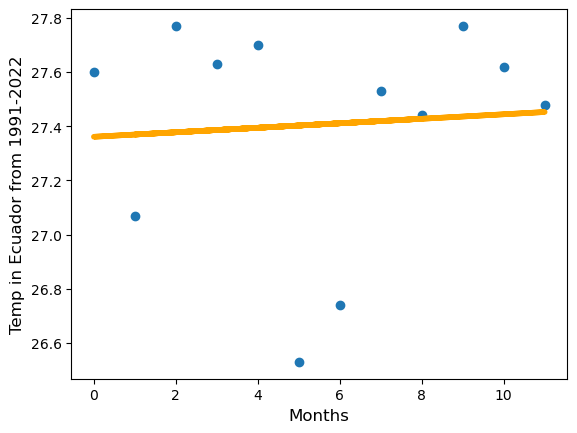

In [125]:
plt.scatter(x,y) 
yhat = (0.0083)*x + 27.3609
fig = plt.plot(x,yhat, lw=4, c= 'orange', label = 'regression line') 
plt.xlabel('Months', fontsize = 12) 
plt.ylabel('Temp in Ecuador from 1991-2022', fontsize = 12) 
plt.show()

In [126]:
temp.head(2)

,Average Minimum Surface Air Temperature,Average Mean Surface Air Temperature,Average Maximum Surface Air Temperature,Precipitation,Category
0,15.87,21.76,27.70,171.99,4
1,16.10,21.84,27.63,217.77,3


In [127]:
df=temp.drop(['Category'], axis=1)
df.head(2)

,Average Minimum Surface Air Temperature,Average Mean Surface Air Temperature,Average Maximum Surface Air Temperature,Precipitation
0,15.87,21.76,27.70,171.99
1,16.10,21.84,27.63,217.77


In [128]:
# Split the data into train and test data
close_data = temp['Average Maximum Surface Air Temperature'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

x_train = close_data[:split]
y_test = close_data[split:]

date_train = temp['Category'][:split]
date_test = temp['Category'][split:]

print(len(x_train))
print(len(y_test))

9
3


In [129]:
# Further split train and test data
x_train, x_test, y_train, y_test = train_test_split(x_train, date_train, test_size = 0.20, random_state=1)

In [130]:
# Randomforest fit the model and predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=1)
model.fit(x_train, y_train)
# make predictions
yhat = model.predict(x_test)
print(yhat)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

[8 0]
Accuracy: 0.000


In [131]:
#Predicting the test set results and calculating the accuracy using logistics regression
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
print (x_test) #test dataset
print (y_pred) #predicted values
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

[[27.48]
 [27.53]]
[4 4]
Accuracy of logistic regression classifier on test set: 0.00


In [132]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[0 0 0]
 [1 0 0]
 [1 0 0]]


In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_cla